In [1]:
import gym
from gym import spaces
from gym.utils import seeding
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make('Blackjack-v1')

# NOTE

Using every visit or first visit makes absolutely no difference. Since, in any 1 episode we cannot visit a state twice as we don't have an option of getting a card which has a value of '0'. Hence, we will always move to some other state.
It is True, if we decide to stick we remain in our current state, however, then this state becomes the terminal state and I am not including repeated state or the terminal state in my episode only.


X axis: Delaers card (1,2,3,4,5,6,7,8,9,10)
Y-axis: My Sum(12,1,3,14,15....21)

# Generate Episodes

In [3]:
def generate_episode():
    
    episode=[]
    S0=env.reset()
    
    while(S0[0]<12):
        S0= env.reset()
        
    state= S0
    action= action_from_policy(state)
    done= False
    
    while(done!=True):
        
        next_state, reward, done, info= env.step(action)
        
        sar= (state,action,reward)
        episode.append(sar)
        
        state= next_state
        action= action_from_policy(state)

    return episode

# Action as per policy

In [4]:
def action_from_policy(state):
    
    if(state[0]>19):
        return 0
    else:
        return 1   

# USABLE ACE

In [5]:
#USABLE ACE CASE
def a_mc_every_visit(counter):
    
    S_mean= np.zeros((10,10))
    S_count=np.zeros((10,10)) #Usable Ace --> (12,13,14...21)x(1,2,3...10)==> 10 x 10


    while (True):
        
        episode= generate_episode()
        
        if(episode[0][0][2]==True and counter>0):
            
            counter-=1


           

            t= len(episode)-1
            G=0

            while(t>=0):
                G= G + episode[t][2]

                state= episode[t][0]
                
                x= state[1]-1  #Min dealer's card is ace, hence 0 is the index for 1.
                y= state[0]-12 #Min sum possible is 12 incase of usable ace, hence index 0 will be 12.



                S_mean[x][y]=  ( (S_mean[x][y]*S_count[x][y]) + G) / (S_count[x][y]+1)
                S_count[x][y]+=1

                t=t-1
        if(counter==0):
            break
            
        
        
    v=S_mean
    return v


In [6]:
v_10000= a_mc_every_visit(10000)    #For 10,000 episodes
v_500000=  a_mc_every_visit(500000) #For 500,000 episodes

# NO USABLE ACE

In [7]:
#NO USABLE ACE CASE
def na_mc_every_visit(counter):
    
    S_mean= np.zeros((10,10))
    S_count=np.zeros((10,10))


    while (True):
        
        episode= generate_episode()
        
        if(episode[0][0][2]==False and counter>0):
            
            counter-=1

            t= len(episode)-1
            G=0

            while(t>=0):
                G= G + episode[t][2]

                state= episode[t][0]

                
                x= state[1]-1 #x axis is dealer's card
                y= state[0]-12 #y axis is my sum


                S_mean[x][y]=  ( (S_mean[x][y]*S_count[x][y]) + G) / (S_count[x][y]+1)
                S_count[x][y]+=1

                t=t-1
                
        if(counter==0):
            break
            
        
        
    v=S_mean
    return v


In [8]:
v2_10000= na_mc_every_visit(10000) #For 10,000 episodes
v2_500000= na_mc_every_visit(500000) #For 500,000 episodes

# FIGURE 5.1)

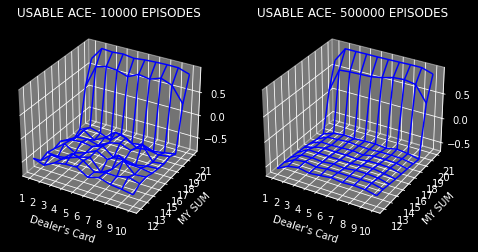

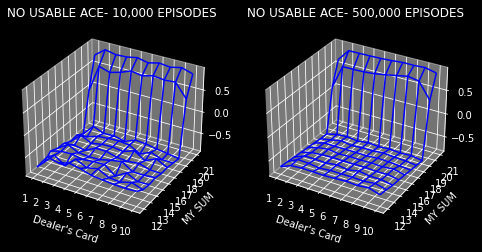

In [29]:
my_sum=[12,13,14,15,16,17,18,19,20,21]
dealers_card= [1,2,3,4,5,6,7,8,9,10]
Y,X= np.meshgrid(my_sum, dealers_card)

plt.style.use('dark_background')

#Usable Ace
my_sum=[12,13,14,15,16,17,18,19,20,21]
dealers_card= [1,2,3,4,5,6,7,8,9,10]
Y,X= np.meshgrid(my_sum, dealers_card)

plt.style.use('dark_background')

fig = plt.figure(0,figsize=plt.figaspect(0.5))
# ax= plt.axes(projection='3d')
ax = fig.add_subplot(1, 2, 1, projection='3d')
plt.title('USABLE ACE- 10000 EPISODES')
ax.set_xlabel("Dealer's Card")
ax.set_ylabel("MY SUM")
ax.set_xticks(dealers_card)
ax.set_yticks(my_sum)
ax.plot_wireframe(X, Y, v_10000, color='blue')

ax = fig.add_subplot(1, 2, 2, projection='3d')
plt.title('USABLE ACE- 500000 EPISODES')
ax.set_xlabel("Dealer's Card")
ax.set_ylabel("MY SUM")
ax.set_xticks(dealers_card)
ax.set_yticks(my_sum)
ax.plot_wireframe(X, Y, v_500000, color='blue')
plt.show()


# No Usabe Ace
fig = plt.figure(1,figsize=plt.figaspect(0.5))
# ax= plt.axes(projection='3d')
ax = fig.add_subplot(1, 2, 1, projection='3d')
plt.title('NO USABLE ACE- 10,000 EPISODES')
ax.set_xlabel("Dealer's Card")
ax.set_ylabel("MY SUM")
ax.set_xticks(dealers_card)
ax.set_yticks(my_sum)
ax.plot_wireframe(X, Y, v2_10000, color='blue')

ax = fig.add_subplot(1, 2, 2, projection='3d')
plt.title('NO USABLE ACE- 500,000 EPISODES')
ax.set_xlabel("Dealer's Card")
ax.set_ylabel("MY SUM")
ax.set_xticks(dealers_card)
ax.set_yticks(my_sum)
ax.plot_wireframe(X, Y, v2_500000, color='blue')
plt.show()





# Dealer's Card vs Player Sum Table.
### Player sum ranges from 12 to 21

In [14]:
dic={}
for j in range(10):
    temp=[]
    for i in range(10):
        
        temp.append(round(v_500000[j][i],2))
    
    dic[j]= temp

    
dic2={}
for j in range(10):
    temp=[]
    for i in range(10):
        
        temp.append(round(v2_500000[j][i],2))
    
    dic2[j]= temp

In [11]:
print('USABLE ACE- 500000 EPISODES')
print('Dealer ACE:   ',dic[0])
print('Dealer TWO:   ',dic[1])
print('Dealer THREE: ',dic[2])
print('Dealer FOUR:  ',dic[3])
print('Dealer FIVE:  ',dic[4])
print('Dealer SIX:   ',dic[5])
print('Dealer SEVEN: ',dic[6])
print('Dealer EIGHT: ',dic[7])
print('Dealer NINE:  ',dic[8])
print('Dealer TEN:   ',dic[9])


print()
print()
print()

print('NO USABLE ACE- 500000 EPISODES')
print('Dealer ACE:   ',dic2[0])
print('Dealer TWO:   ',dic2[1])
print('Dealer THREE: ',dic2[2])
print('Dealer FOUR:  ',dic2[3])
print('Dealer FIVE:  ',dic2[4])
print('Dealer SIX:   ',dic2[5])
print('Dealer SEVEN: ',dic2[6])
print('Dealer EIGHT: ',dic2[7])
print('Dealer NINE:  ',dic2[8])
print('Dealer TEN:   ',dic2[9])




USABLE ACE- 500000 EPISODES
Dealer ACE:    [-0.56, -0.56, -0.57, -0.58, -0.59, -0.62, -0.65, -0.65, 0.16, 0.68]
Dealer TWO:    [-0.44, -0.43, -0.45, -0.46, -0.52, -0.53, -0.54, -0.57, 0.64, 0.97]
Dealer THREE:  [-0.4, -0.4, -0.44, -0.46, -0.48, -0.53, -0.53, -0.54, 0.66, 0.97]
Dealer FOUR:   [-0.45, -0.44, -0.46, -0.46, -0.49, -0.52, -0.51, -0.56, 0.67, 0.97]
Dealer FIVE:   [-0.42, -0.42, -0.43, -0.46, -0.49, -0.51, -0.53, -0.54, 0.68, 0.97]
Dealer SIX:    [-0.4, -0.41, -0.45, -0.47, -0.5, -0.53, -0.53, -0.53, 0.71, 0.98]
Dealer SEVEN:  [-0.42, -0.42, -0.42, -0.45, -0.47, -0.49, -0.52, -0.56, 0.77, 0.98]
Dealer EIGHT:  [-0.41, -0.41, -0.42, -0.44, -0.46, -0.49, -0.52, -0.51, 0.79, 0.99]
Dealer NINE:   [-0.42, -0.41, -0.44, -0.47, -0.47, -0.5, -0.52, -0.54, 0.75, 0.98]
Dealer TEN:    [-0.47, -0.47, -0.49, -0.51, -0.53, -0.54, -0.56, -0.59, 0.44, 0.92]



NO USABLE ACE- 500000 EPISODES
Dealer ACE:    [-0.65, -0.67, -0.7, -0.72, -0.73, -0.75, -0.78, -0.79, 0.15, 0.64]
Dealer TWO:    [-0.5